# Recognizing MNIST Handwritten Digits using KNN

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df = pd.read_csv('/home/yuvraj/Documents/machine-learning-online-2018-master/Datasets/MNIST-2/mnist_train.csv')

In [3]:
print(df.shape)

(42000, 785)


In [4]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [7]:
# Divide data table into X and y separately
X = data[:, 1:]
y = data[:, 0]

print(X.shape, y.shape)

(42000, 784) (42000,)


In [8]:
# Split data into training and testing
split = int(0.8*X.shape[0]) # 80% of the data is Training data
print(split)

X_train = X[:split, :]
y_train = y[:split]

X_test = X[split:, :]
y_test = y[split:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


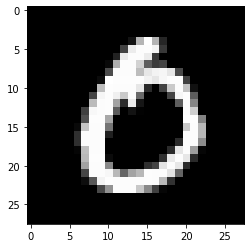

0


In [10]:
# Visualise some samples
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()
    
drawImg(X_train[200])
print(y_train[200])

### K-Nearest Neighbor (knn)

In [11]:
# KNN algorithm
# Everything is gonna happen at Prediction time; there is no Training time
# KNN is not gonna learn any parameters
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

# test time
def knn(X, Y, queryPoint, k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    # nearest/first k points
    vals = vals[:k]
    
    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

## Make Predictions 

In [12]:
# Make predictions
pred = knn(X_train, y_train, X_test[1]) # here X_test is our queryPoint

In [13]:
print(int(pred))

7


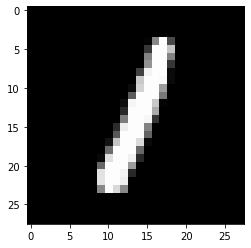

1


In [14]:
drawImg(X_test[200])
print(y_test[200])

In [15]:
queryPoint = X_test[4]
expected_output = y_test[4]

In [16]:
our_ouput = knn(X_train,y_train,queryPoint)

In [17]:
our_ouput, expected_output

(2.0, 2)

## Measuring the model

In [18]:
def getaccuracy(X,y,queryPoints,queryPoints_ans):
    output = []
    
    for query in queryPoints:
        output.append(knn(X,y,query))
    output = np.array(output)
    
    acc = (output == queryPoints_ans).sum() 
    return acc / queryPoints.shape[0]

In [25]:
getaccuracy(X_train,y_train, X_test, y_test)

0.9861111111111112